In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
print("Dataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  

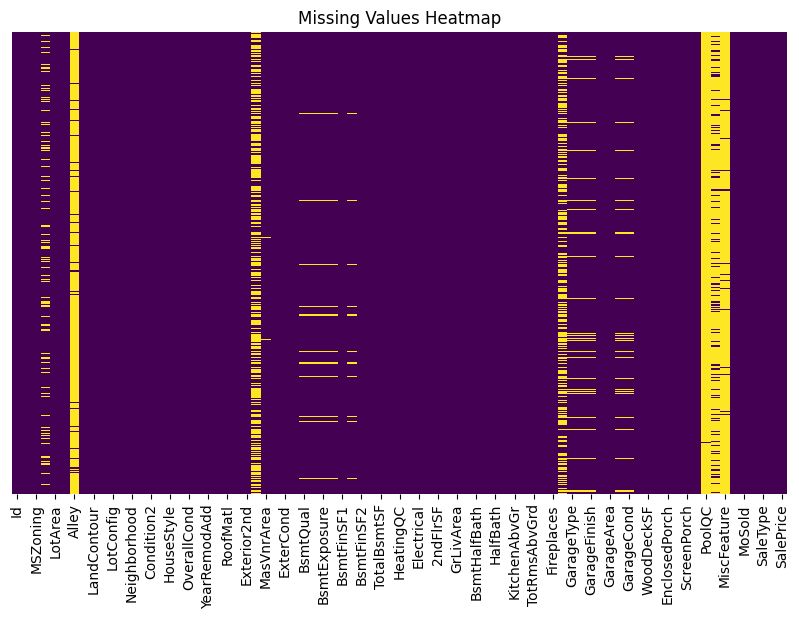

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

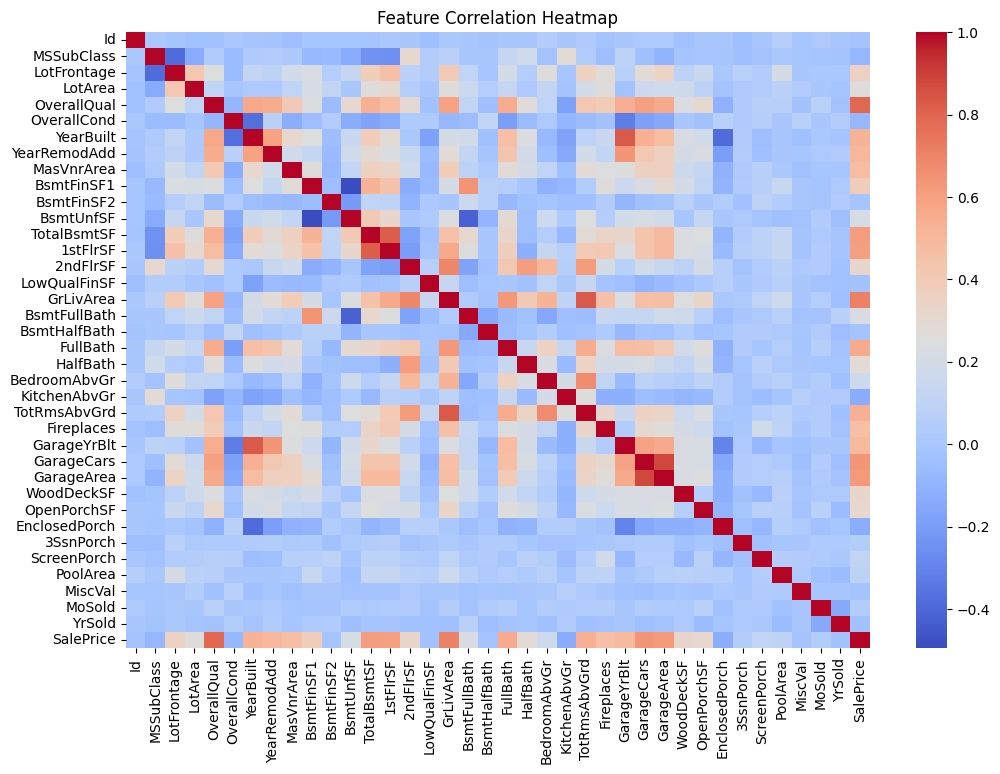

In [4]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


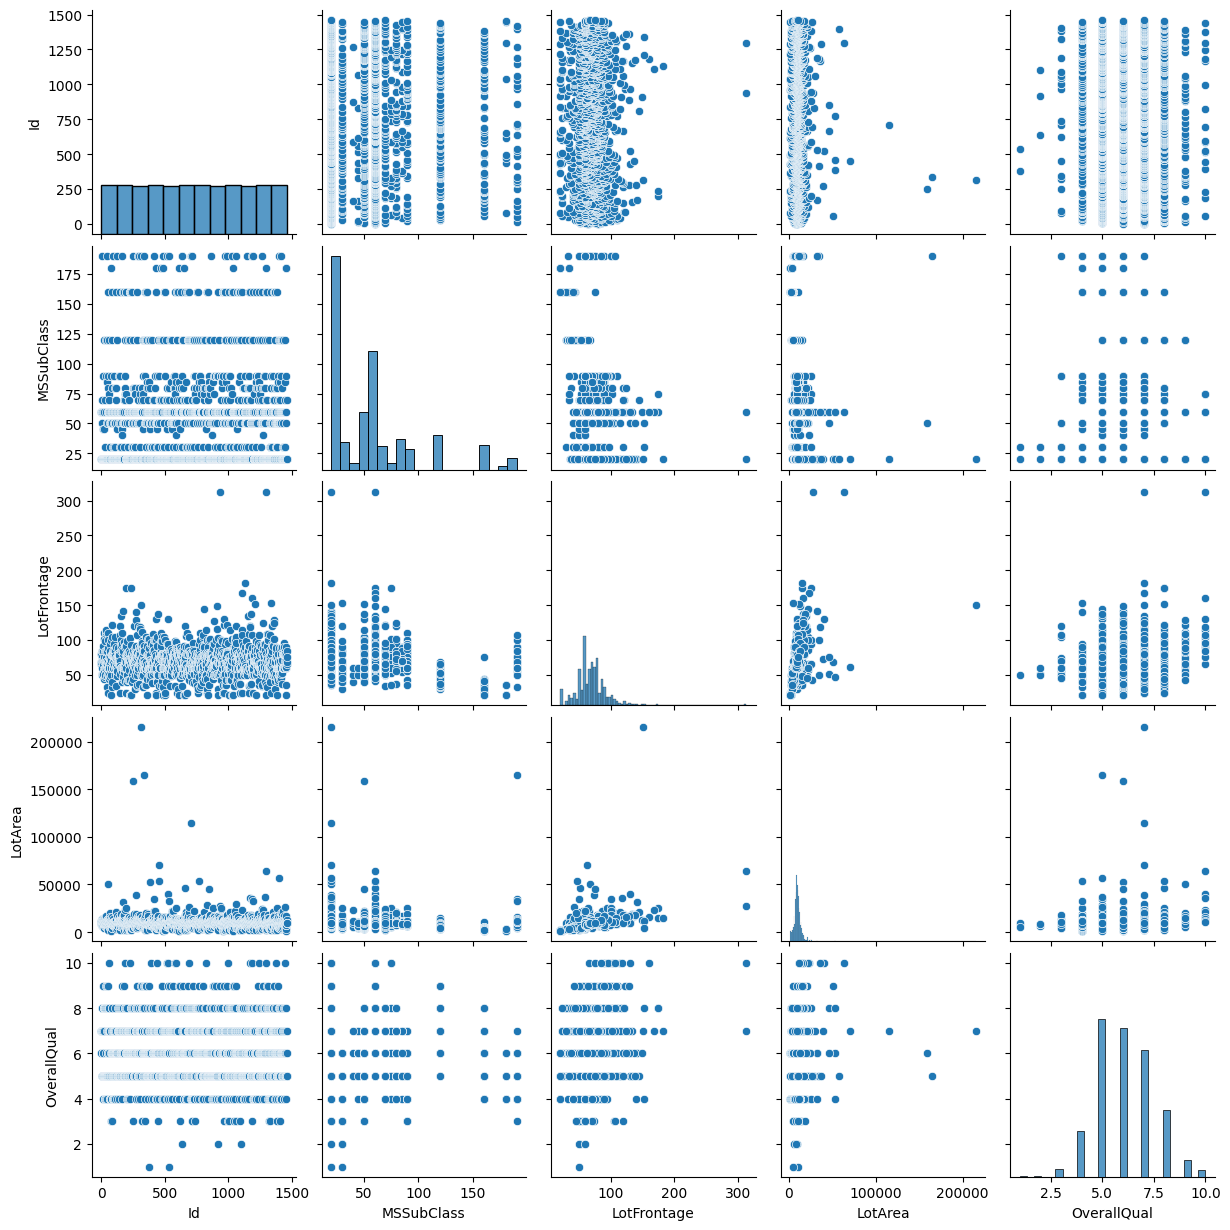

In [5]:
num_features = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[num_features[:5]])  # Limiting to 5 for better visualization
plt.show()

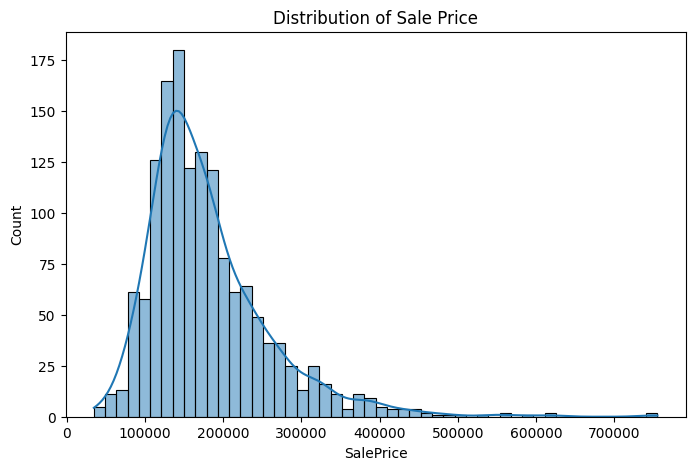

In [6]:
if 'SalePrice' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['SalePrice'], bins=50, kde=True)
    plt.title("Distribution of Sale Price")
    plt.show()

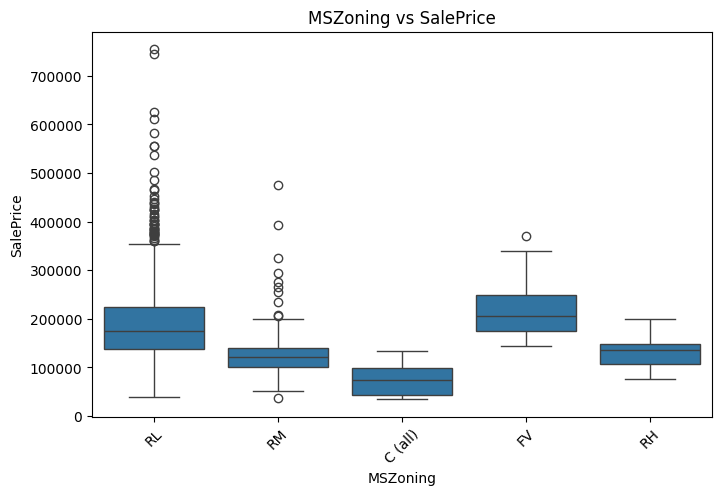

In [7]:
if 'MSZoning' in df.columns and 'SalePrice' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df['MSZoning'], y=df['SalePrice'])
    plt.title("MSZoning vs SalePrice")
    plt.xticks(rotation=45)
    plt.show()

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE

# Select numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns

# Define target variable (UPDATE with your actual target column name)
target = "SalePrice"
features = [col for col in numeric_features if col != target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [16]:
# Train XGBoost Model for Feature Selection
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Use RFE for optimal feature selection
rfe = RFE(xgb_model, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", list(selected_features))

# Retrain XGBoost with Selected Features
X_train_selected, X_test_selected = X_train[selected_features], X_test[selected_features]
xgb_model.fit(X_train_selected, y_train)
y_pred = xgb_model.predict(X_test_selected)

Selected Features: ['OverallQual', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'Fireplaces', 'GarageCars']


In [18]:

# Model Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"XGBoost R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

XGBoost R² Score: 0.9079
MAE: 17639.1503
MSE: 706057918.0073


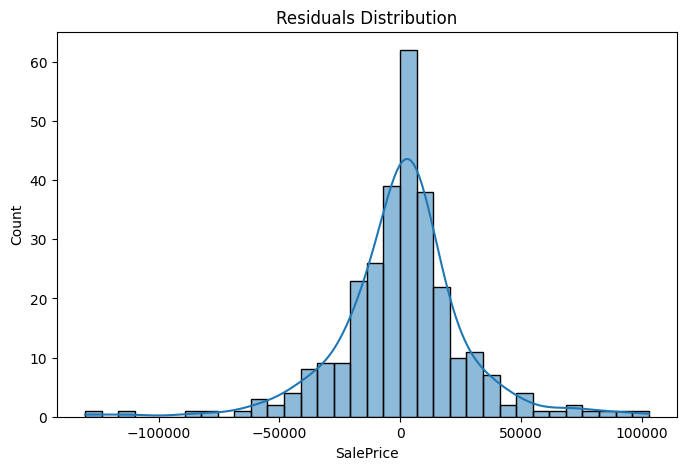

In [20]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


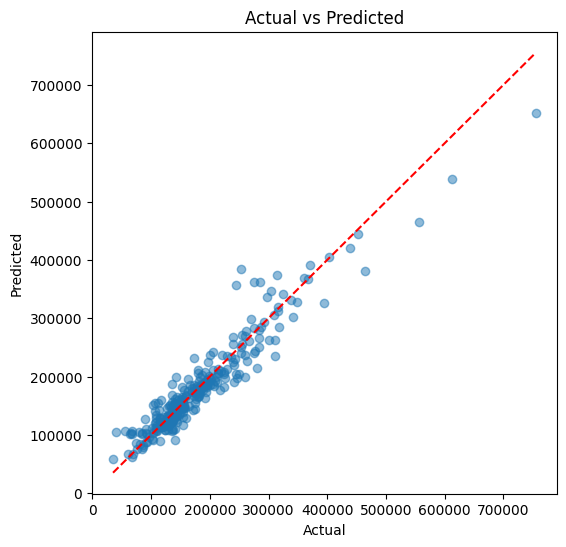

In [22]:
# Actual vs Predicted Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  # Reference line
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Neural Network Model (Alternative)
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Neural Network
history = nn_model.fit(X_train_selected, y_train, validation_data=(X_test_selected, y_test), epochs=20, batch_size=16, verbose=1)

# Predict with Neural Network
y_pred_nn = nn_model.predict(X_test_selected).flatten()

# Evaluate Neural Network
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network R² Score: {r2_nn:.4f}")

Epoch 1/200
